In [1]:
from RUL_part import *

In [41]:
args_result = np.load('./numpy/arg_all_result041201.npy',allow_pickle=True).tolist()

In [42]:
mode_predict_result = [get_hat_rho_l(test_dataset[i],*args_result).reshape(2) for i in range(100)]
mode_true = [test_dataset[i]["mode"] for i in range(100)]
corr = 0
err = 0
for i in range(100):
    if np.sum(mode_predict_result[i] - mode_true [i]) < 0.005:
        corr+=1
    else:
        err+=1
print(corr,err)

100 0


In [46]:
RUL_hat = get_RUL(test_dataset,[1,1],*args_result)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.22it/s]


In [48]:
RUL_hat

array([ 51,  54,  47, 111, 500, 354,  54,  59,  57,  70,  72,  99, 104,
        40, 119,  83, 336, 171,  95,  81,  46, 150, 111,  15,  51,   9,
       172, 196, 113,  75, 117,  52,  76,  66, 122, 156, 219,  27,   1,
        56, 158, 114, 179,  60, 163,   9, 371,  76, 451,  17,  82, 257,
        77, 359,  57,  88, 113,  42,  45, 119, 189,  64, 262,  29, 180,
       106, 104, 257, 192,  81,  50,  58, 104, 180,  43,  19, 108,  29,
        24, 500,  21,  10, 147, 165,  78,  37,  94, 271,  69,  56, 116,
        22,  82,  12, 181, 175, 158,  27,   9,  21])

In [44]:
#RUL
path = DATA_PATH+'RUL.csv'
RUL_frame = pd.read_csv(path, header=None)
RUL = RUL_frame.values[:, 0]
RUL

array([ 44,  51,  27, 120, 101,  99,  71,  55,  55,  66,  77, 115, 115,
        31, 108,  56, 136, 132,  85,  56,  18, 119,  78,   9,  58,  11,
        88, 144, 124,  89,  79,  55,  71,  65,  87, 137, 145,  22,   8,
        41, 131, 115, 128,  69, 111,   7, 137,  55, 135,  11,  78, 120,
        87,  87,  55,  93,  88,  40,  49, 128, 129,  58, 117,  28, 115,
        87,  92, 103, 100,  63,  35,  45,  99, 117,  45,  27,  86,  20,
        18, 133,  15,   6, 145, 104,  56,  25,  68, 144,  41,  51,  81,
        14,  67,  10, 127, 113, 123,  17,   8,  28], dtype=int64)

In [47]:
np.sum(abs(RUL_hat-RUL))-400

3936

In [49]:
mode_true

[array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1.

# 第i个in_unit

In [6]:
result_args_a = np.load('./numpy/arg_all_result041001_a.npy',allow_pickle=True).tolist()
result_args_b = np.load('./numpy/arg_all_result041001_b.npy',allow_pickle=True).tolist()

In [34]:
num_unit = 1

In [35]:
test_dataset[num_unit]["mode"]

array([1., 0.])

In [36]:
hj = np.argmax(test_dataset[num_unit]["mode"])
# 选取了第二个mode单独的参数
selected_args = []
args_q = [result_args_a,result_args_b][hj][0]
# args_q = result_args_b[0]
selected_args.append(1) # dk
selected_args.append(args_q[1]) # wk
#selected_args.appned(args_q[1])
for idx in range(3):
    selected_args.append(args_q[-1][idx])
# 按照完整的流程计算参数
selected_args_all = mode_para_selection(test_dataset[num_unit], [1,1], *args_result)

In [37]:
get_single_RUL(test_dataset[num_unit],*selected_args),get_single_RUL(test_dataset[num_unit],*selected_args_all),RUL[num_unit]

(53, 54, 51)

## 看下如果是单独算的效果

In [38]:
w = selected_args[1]
mu_q, Sigma_q = get_post_Sigma_q_and_mu_q(test_dataset[num_unit], *selected_args)
mu_q_ = selected_args[2]
HI_q = test_dataset[num_unit]["input"] @ w

In [39]:
Phi_q,time_axes = generate_Phi_and_timeaxes(300)

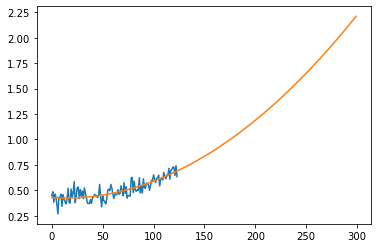

In [40]:
plt.plot(HI_q) 
plt.plot(Phi_q @ mu_q)
#plt.plot(Phi_q @ mu_q_, color = "r")

## 看下一起算的效果

In [15]:
w = selected_args_all[1]
mu_q, Sigma_q = get_post_Sigma_q_and_mu_q(test_dataset[num_unit], *selected_args_all)
mu_q_ = selected_args_all[2]
HI_q = test_dataset[num_unit]["input"] @ w
Phi_q,time_axes = generate_Phi_and_timeaxes(300)

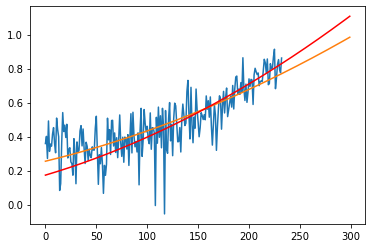

In [16]:
plt.plot(HI_q) 
plt.plot(Phi_q @ mu_q)
plt.plot(Phi_q @ mu_q_, color = "r")

# 训练集的效果

In [19]:
num_unit = 34

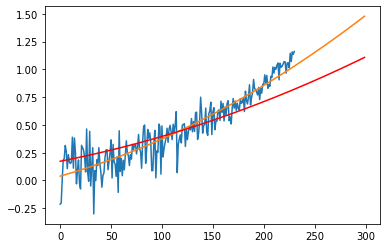

In [20]:
w = selected_args_all[1]
mu_q, Sigma_q = get_post_Sigma_q_and_mu_q(train_dataset[num_unit], *selected_args_all)
mu_q_ = selected_args_all[2]
HI_q = train_dataset[num_unit]["input"] @ w
Phi_q,time_axes = generate_Phi_and_timeaxes(300)
plt.plot(HI_q) 
plt.plot(Phi_q @ mu_q)
plt.plot(Phi_q @ mu_q_, color = "r")